# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice.
number_mice = merged_df['Mouse ID'].nunique()
print(number_mice)

249


In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate_mice = duplicate_mice['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_df.loc[merged_df['Mouse ID'] == "g989", :]
duplicate_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
# Using ~ to filter out rows from merged_df where there is a duplicate, acts as a logical for a boolean
# .isin filters the DataFrame by selecting rows where their is a common value in another series
clean_data = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice_id)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice in the clean DataFrame.
no_dupe_mice_check = clean_data['Mouse ID'].nunique()
no_dupe_mice_check

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = merged_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stat_data = {
    'Mean Tumor Volume': drug_regimen['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': drug_regimen['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': drug_regimen['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': drug_regimen['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': drug_regimen['Tumor Volume (mm3)'].sem()
}

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(summary_stat_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_agg = drug_regimen['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stat_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

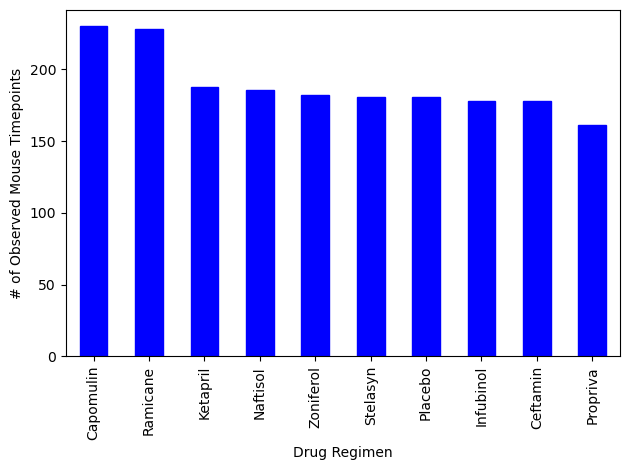

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_stat_df = merged_df['Drug Regimen'].value_counts()
summary_stat_df.plot(kind = 'bar', color = 'blue', edgecolor = 'blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


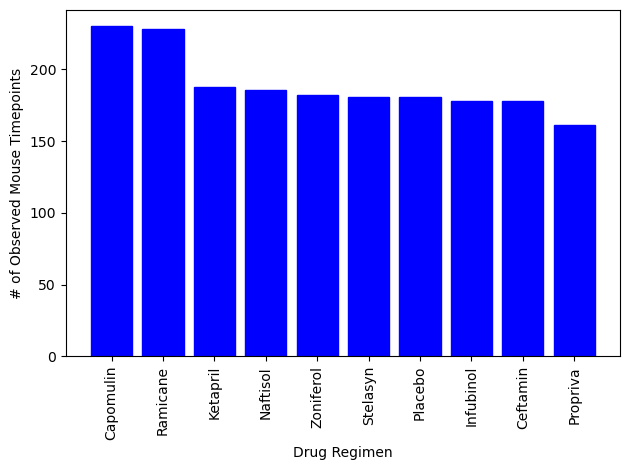

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
summary_stat_df = merged_df['Drug Regimen'].value_counts()
drug_regimen_names = summary_stat_df.index
mouse_timepoints = summary_stat_df.values

plt.bar(drug_regimen_names, mouse_timepoints, color = 'blue', edgecolor= 'blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

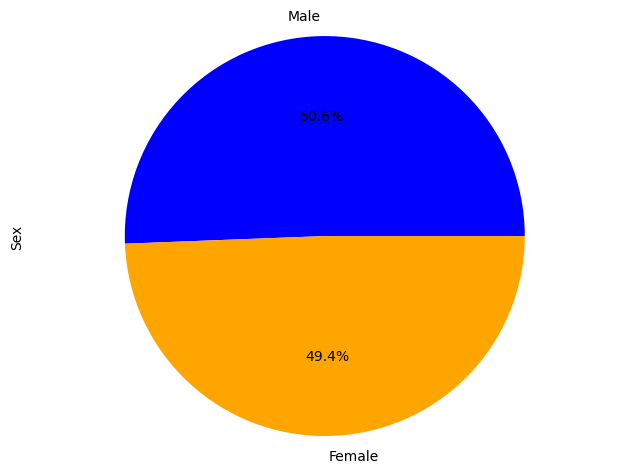

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = merged_df['Sex'].value_counts()
male_vs_female.plot(kind='pie',autopct='%1.1f%%', startangle=360, colors=['blue','orange'])
plt.ylabel('Sex')
plt.axis('equal')
plt.tight_layout()
plt.show()

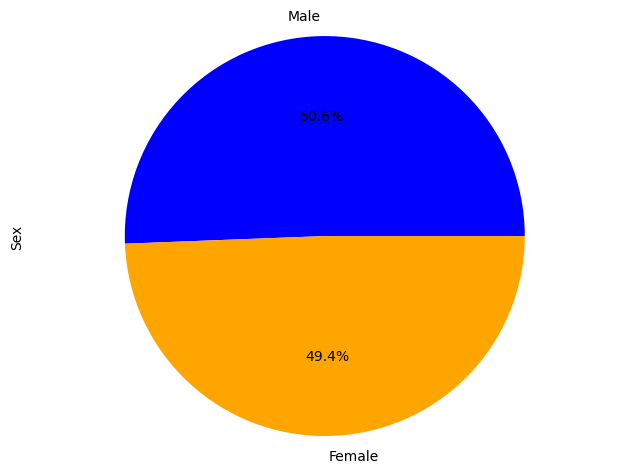

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = merged_df['Sex'].value_counts()
colors = ['blue','orange']
plt.pie(male_vs_female, labels=male_vs_female.index, autopct='%1.1f%%', startangle=360, colors=colors)
plt.ylabel('Sex')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimen_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = merged_df[merged_df['Drug Regimen'].isin(regimen_treatment)]
tumor_merged_df = pd.merge(last_timepoint, tumor_volume, on=['Mouse ID','Timepoint'], how='inner')
tumor_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_treatment:
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_loop = tumor_merged_df.loc[tumor_merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volume.append(tumor_loop)

    # add subset     
    quartiles = tumor_loop.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*inter_quartile)
    upper_bound = upper_quartile + (1.5*inter_quartile)
   
    # Determine outliers using upper and lower bounds
    outliers = tumor_loop[(tumor_loop < lower_bound) | (tumor_loop > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}.")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


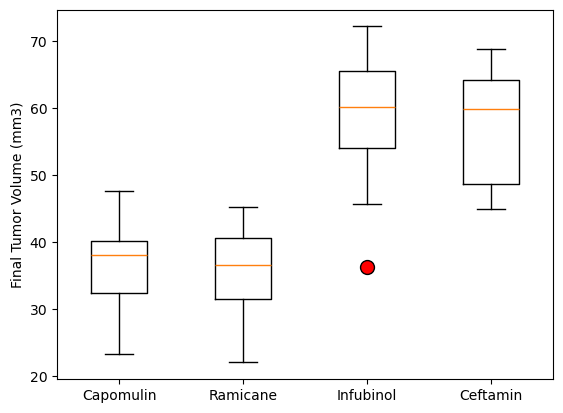

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([tumor_merged_df[tumor_merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in treatments],
            labels=treatments, flierprops=dict(markerfacecolor='red', markersize=10))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()



## Line and Scatter Plots

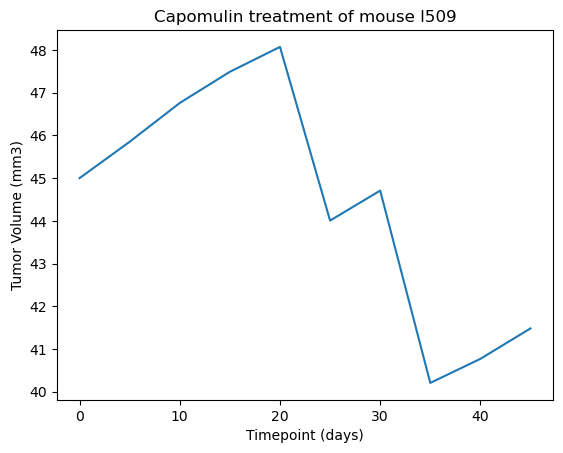

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509") ]
capomulin_df_line_graph = mouse_l509[["Timepoint","Tumor Volume (mm3)" ]]
capomulin_df_line_graph = capomulin_df_line_graph.set_index(["Timepoint"])
timepoint = capomulin_df_line_graph.index.values
tumor_volume_plot = capomulin_df_line_graph.values
plt.plot(timepoint, tumor_volume_plot)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

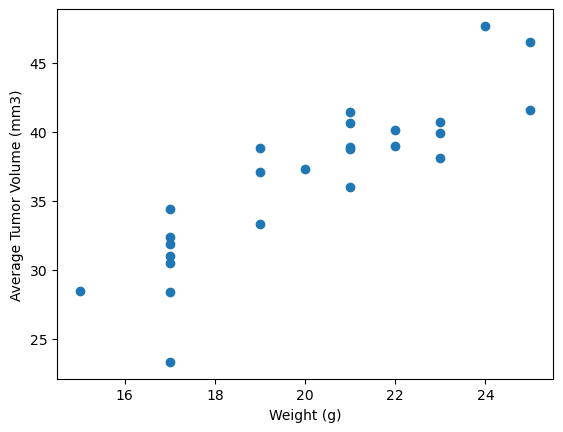

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = tumor_merged_df[tumor_merged_df['Drug Regimen']== 'Capomulin']
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

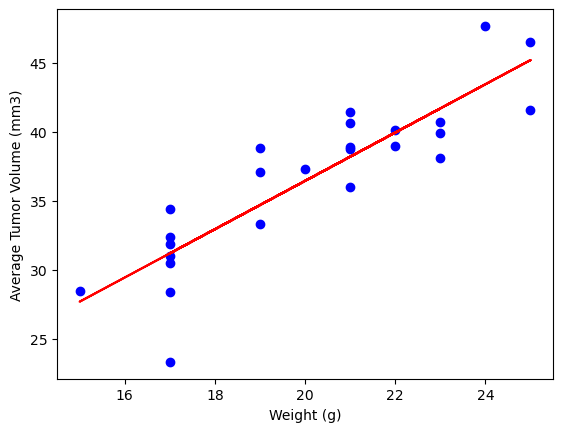

The correlation between mouse weight and the average tumor volume is 0.88


In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = capomulin_df['Weight (g)'].corr(capomulin_df['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
predicted_tumor_volume = slope * capomulin_df['Weight (g)'] + intercept
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'], color='blue')
plt.plot(capomulin_df['Weight (g)'], predicted_tumor_volume, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")